## Digits identification using Simple Neural Network

### We'll import MNIST dataset directly from the Keras library. 

In [1]:
## Import required packages
import matplotlib.pyplot as plt
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


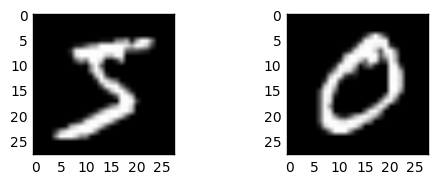

In [2]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Just to check the type of images, we will plot first 2 images 
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.show()

In [3]:
# Set random seed for reproducibility
numpy.random.seed(126)

# flatten 28*28 images to a 784 vector for each image. Also, I am forcing the precision of the pixel requirements to 32 bit to handle memory issues
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# The values in the 784 vector for each image will be in the range 0-255, I will next normalize this in 0-1 
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# Y values lie in the range 0-9, so I will next convert this variable to categorical for both test and train dataset
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Check the number of classes in the dataset. 
num_classes = y_train.shape[1]

### Create a simple baseline Neural Network Model with single hidden layer

In [5]:
# define baseline model
def simple_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

#### Build and then run the model

In [6]:
# build the model
model = simple_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
16s - loss: 0.2811 - acc: 0.9204 - val_loss: 0.1395 - val_acc: 0.9601
Epoch 2/10
15s - loss: 0.1127 - acc: 0.9677 - val_loss: 0.0963 - val_acc: 0.9715
Epoch 3/10
15s - loss: 0.0719 - acc: 0.9794 - val_loss: 0.0781 - val_acc: 0.9765
Epoch 4/10
16s - loss: 0.0501 - acc: 0.9850 - val_loss: 0.0743 - val_acc: 0.9782
Epoch 5/10
16s - loss: 0.0367 - acc: 0.9897 - val_loss: 0.0633 - val_acc: 0.9800
Epoch 6/10
16s - loss: 0.0274 - acc: 0.9926 - val_loss: 0.0636 - val_acc: 0.9799
Epoch 7/10
17s - loss: 0.0202 - acc: 0.9950 - val_loss: 0.0695 - val_acc: 0.9792
Epoch 8/10
15s - loss: 0.0149 - acc: 0.9965 - val_loss: 0.0579 - val_acc: 0.9819
Epoch 9/10
15s - loss: 0.0100 - acc: 0.9980 - val_loss: 0.0615 - val_acc: 0.9814
Epoch 10/10
15s - loss: 0.0075 - acc: 0.9988 - val_loss: 0.0594 - val_acc: 0.9823
Baseline Error: 1.77%


#### The baseline error rate for this is 1.77% which is not bad considering that we have only created a simple Neural Network model with just one hidden layer, we can improve this by adding more layers. However, for more complex datasets, simple neural network may not suffice and we may need to use complex models like C-NN.